Explicación pendiente....

In [27]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
# Estilo de gráficos
plt.style.use('dark_background')

In [28]:
# Estilo de gráficos
plt.style.use('dark_background')

In [29]:
def Box_Muller_v1(N):
    """ Devuelve dos variables normales aleatorias en (-1,1)
    
    Parameters
    ----------
    N : int
        Cantidad de puntos para las variables aleatorias
        
    Returns
    -------
    np.ndarray, np.ndarray
        Dos arreglos numpy que materializan las dos variables aleatorias normales en (-1,1)
        
    """
    import numpy as np 
    from math import atan2
    # Creo dos variables aleatorias uniformes en (-1,1)
    x = 2*np.random.random(N) - 1
    y = 2*np.random.random(N) - 1
    # Defino R**2 y tan(y/x) (transformaciones de Box Muller)
    ij = 0
    R2 = []
    Theta = []
    while ij<N:
        R2.append( x[ij]**2 + y[ij]**2 )
        Theta.append( atan2(y[ij], x[ij]) )
        ij = ij + 1
    # Obtengo las variables aleatorias "a" y "b" en los intervalos (0,1)
    a = []
    b = []
    ij = 0
    while ij<N:
        if R2[ij]<1:
            a.append( R2[ij] *np.cos(Theta[ij]) )
            b.append( R2[ij]*np.sin(Theta[ij]) )
        ij = ij + 1       
    # Transformo a numpy array 
    a = np.array(a)
    b = np.array(b)
    return a, b

In [30]:
# Creación de números aleatorios que siguen una gaussiana a partir de mi función:
Nums = 10000
a, b = Box_Muller_v1(Nums)
# Para ver cuántos puntos se aprovecharon calculo:
Porc_aprov = 100*len(a)/Nums
print('% de puntos aprovechados:', Porc_aprov)

% de puntos aprovechados: 77.73


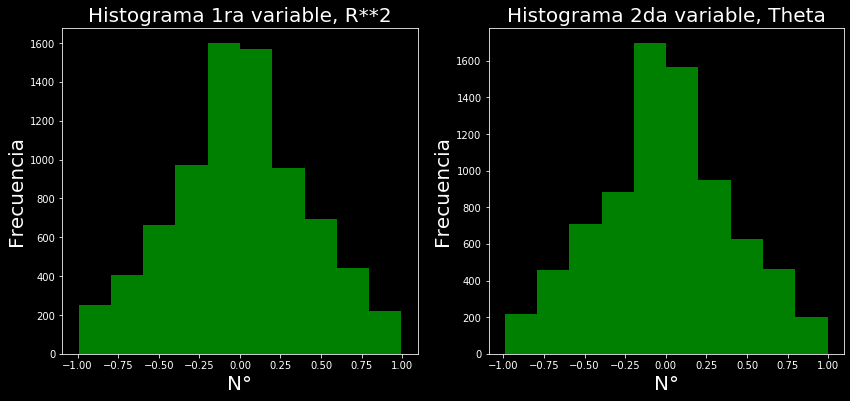

In [31]:
# Histogramas
fig, ax = plt.subplots(1, 2, figsize = (14,6))

ax[0].hist(a, color='green')
ax[1].hist(b, color='green')

ax[0].set_title('Histograma 1ra variable, R**2', fontsize=20)
ax[0].set_xlabel('N°', fontsize=20)
ax[0].set_ylabel('Frecuencia', fontsize=20);
ax[1].set_title('Histograma 2da variable, Theta', fontsize=20)
ax[1].set_xlabel('N°', fontsize=20)
ax[1].set_ylabel('Frecuencia', fontsize=20);

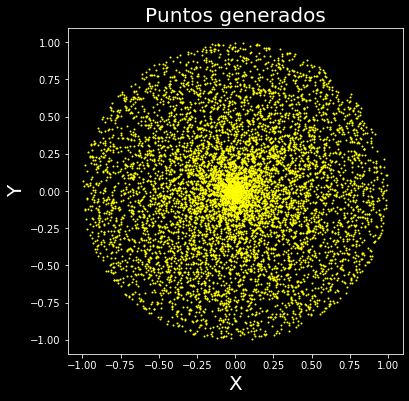

In [32]:
# Puntos generados
fig, ax = plt.subplots(1, 1, figsize = (6,6))

ax.scatter(a, b, s=1, color='yellow')

ax.set_title('Puntos generados', fontsize=20)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20);

## Optimización:
 Para crear "x" e "y" tal que siempre vivan en el círculo de radio 1 debo crealas en los siguientes límites: (-1/sqrt(2), 1/sqrt(2)) porque sólo con ese intervalo consigo que el valor máximo de R = sqrt(x**2+y**2) sea 1.

In [33]:
# Optimización:
def Box_Muller_v2(N):
    """ Devuelve dos variables normales aleatorias en (-1,1)
    
    Parameters
    ----------
    N : int
        Cantidad de puntos para las variables aleatorias
        
    Returns
    -------
    np.ndarray, np.ndarray
        Dos arreglos numpy que materializan las dos variables aleatorias normales en (-1,1)
        
    """
    import numpy as np 
    from math import atan2
    # Creo variables uniformes tal que maximo[R]=1, donde: R=sqrt(x**2+y**2) 
    x = 2*np.random.random(N)/np.sqrt(2) - 1/np.sqrt(2)
    y = 2*np.random.random(N)/np.sqrt(2) - 1/np.sqrt(2)
    # Defino R**2 y tan(y/x) (transformaciones de Box Muller)
    ij = 0
    R2 = []
    Theta = []
    while ij<N:
        R2.append( x[ij]**2 + y[ij]**2 )
        Theta.append( atan2(y[ij], x[ij]) )
        ij = ij + 1
    # Obtengo las variables aleatorias "a" y "b" en los intervalos (0,1)
    a = []
    b = []
    ij = 0
    while ij<N:
        if R2[ij]<1:
            a.append( R2[ij]*np.cos(Theta[ij]) )
            b.append( R2[ij]*np.sin(Theta[ij]) )
        ij = ij + 1       
    # Transformo a numpy array 
    a = np.array(a)
    b = np.array(b)
    return a, b

In [34]:
#Calculo nuevas variables aleatorias que siguen la gaussiana
a2,b2 = Box_Muller_v2(10000)

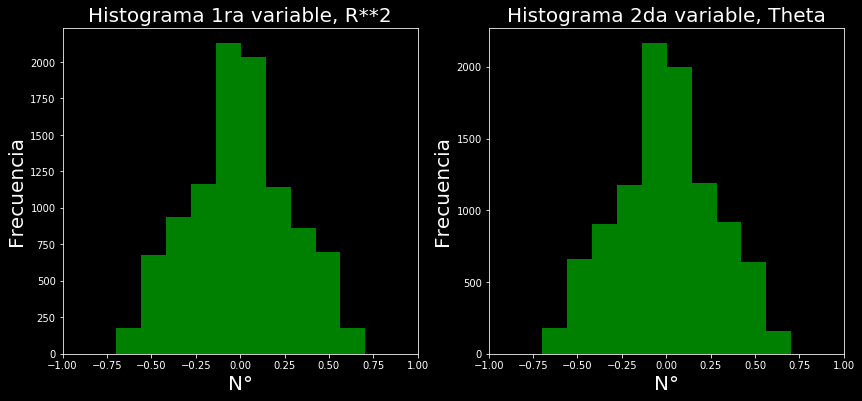

In [35]:
# Histogramas
fig, ax = plt.subplots(1, 2, figsize = (14,6))

ax[0].hist(a2, color='green')
ax[1].hist(b2, color='green')

ax[0].set_title('Histograma 1ra variable, R**2', fontsize=20)
ax[0].set_xlim(-1,1)
ax[0].set_xlabel('N°', fontsize=20)
ax[0].set_ylabel('Frecuencia', fontsize=20);
ax[1].set_title('Histograma 2da variable, Theta', fontsize=20)
ax[1].set_xlim(-1,1)
ax[1].set_xlabel('N°', fontsize=20)
ax[1].set_ylabel('Frecuencia', fontsize=20);

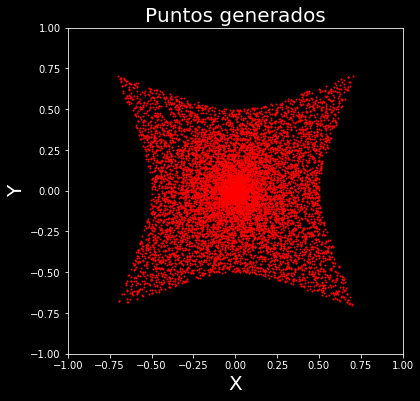

In [36]:
# Puntos generados
fig, ax = plt.subplots(1, 1, figsize = (6,6))

ax.scatter(a2, b2, s=1, color='red')

ax.set_title('Puntos generados', fontsize=20)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20);

Comparación entre los dos métodos

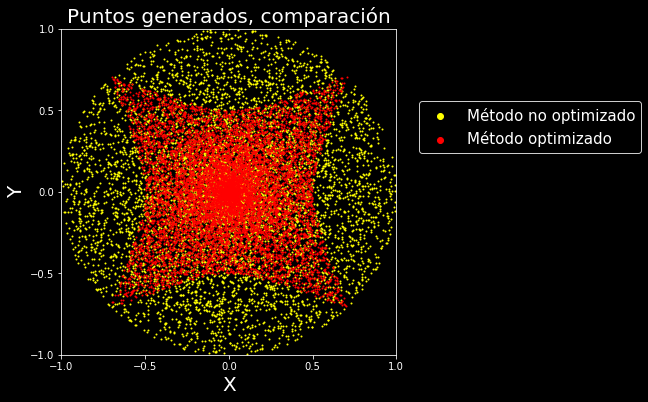

In [37]:
# Puntos generados comparados
fig, ax = plt.subplots(1, 1, figsize = (6,6))

ax.scatter(a, b, s=1, color='yellow', label='Método no optimizado')
ax.scatter(a2, b2, s=1, color='red', label='Método optimizado')

ax.set_title('Puntos generados, comparación', fontsize=20)
ax.set_xticks(np.arange(-1, 1.5, step = 0.5))   
ax.set_yticks(np.arange(-1, 1.5, step = 0.5)) 
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 0.8), fancybox=True,
             shadow=True, ncol=1, fontsize=15, markerscale=6);

Al parecer, al hacer la optimización pierdo puntos. Por ejemplo nunca aparece el punto X=1, Y=0. ¿Hay alguna forma de evitar ésto?